## My Twitter Text Report (Reworked)
By Spencer Murphy

#### Date Created: 3/31/21
#### Last Updated: 4/4/21


**The purpose of this report is to acquire a data set (provided by Professor Silva) and assess its value, arguing for the quality of the data whilst summarizing any weaknesses and possible limitations.**

Utilizing libraries like pandas, matplotlib, nltk along with the VADER sentiment analysis tool, I will be editing a data set that consists of Youtube comments regarding vaccine and anti-vaccine sentiment (for COVID-19). Using these comments, I plan to run a word frequency analysis and a VADER sentiment test, which will ultimately give us a good idea regarding the types of conversations that are being had. I also intend on using univariate plotting via pandas to better display the results of these tests. So, the question at hand is this: How are people feeling about the COVID-19 vaccinations? Is there more of a negative sentiment over positive, or vice-versa? Considering I've talked to people on both sides of the spectrum, I feel as if this will definitely be an exploratory analysis as I don't neccessarily have an idea on how to answer those questions yet. All of this data provided by Professor Silva comes from Youtube and is in the form of a csv file. 



In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
import matplotlib.pyplot as plt
from datetime import datetime as dt


Below we can see keys that will allow me to access separate parts of the csv file. Unfortunately, there are no keys for likes or engagement, so I will be unable to see how people are responding or reacting to the different comments. Including those keys could provide us with even more insight, as we'd be able to look at the most impactful comments, or the comments that are most representative of the ideals on a particular side. Simply put, we can't see which comments are receving the most attention or the least.

In [2]:
you = pd.read_csv('YouTubeVaccination_Dec14-Dec26_2021_fixed.csv')
you.keys()



Index(['Date', 'Title', 'Url', 'Domain', 'Page Type', 'Language', 'Author',
       'Full Name', 'Full Text', 'Original Url', 'Thread Entry Type',
       'Page Type Name', 'Pub Type'],
      dtype='object')

Here we can see a table which neatly displays the beginning of the data. Luckily, all of the comments seem to be in English already, which means there are no comments to exclude from the data that might be in a different language.

In [3]:
you.head()

,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,Original Url,Thread Entry Type,Page Type Name,Pub Type
0,12/26/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=sT80A5uPREolc=...,youtube.com,youtube,en,RJ MacReady,RJ MacReady,"I got the Moderna vaccine, hereâ€™s my list of...",https://www.youtube.com/watch?v=sT80A5uPREolc=...,reply,YouTube,VCOMMENT
1,12/26/2020 23:36,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,@Charlotte Haggerty Do you really believe ever...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
2,12/26/2020 23:34,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,Salavin,Salavin,"I hate it when they say ""You don't want a covi...",https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,reply,YouTube,VCOMMENT
3,12/26/2020 23:30,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,"@Sweet Heart Well, Quantas, an Australian airl...",https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
4,12/26/2020 23:27,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,youtube.com,youtube,en,Kristi Allman,Kristi Allman,@AngryAngy Here they recommend a flu shot duri...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,reply,YouTube,VCOMMENT


### Word Frequency Analysis

To start this word frequency analysis, each character in every comment is lowercased as not doing so could result in error. The next steps include tokenizing each word and symbol in every comment, ridding the data of meaningless stopwords (like "it", "is", "are") along with punctuation, and finally stemming the now-tokens to find the root of each word. The results of this analysis will be displayed in graphs below.

In [5]:
you['lowercase'] = [x.lower() for x in you['Full Text']]
you['lowercase'].head(10)

0    i got the moderna vaccine, hereâ€™s my list of...
1    @charlotte haggerty do you really believe ever...
2    i hate it when they say "you don't want a covi...
3    @sweet heart well, quantas, an australian airl...
4    @angryangy here they recommend a flu shot duri...
5    we don't need a corona vaccine, we need a come...
6    i had no idea of who this guy was prior to thi...
7    @angryangy zero medical test is done before se...
8    @justin kirschenman i don't know about your lo...
9    remember when the french scientist said test a...
Name: lowercase, dtype: object

In [6]:
warnings.filterwarnings('ignore')

In [7]:
import nltk
from nltk import tokenize as tk
from nltk import FreqDist
from nltk.corpus import stopwords
import string
from collections import Counter

  
mystopwords = stopwords.words('english')
mystopwords.append("n't")
mystopwords.append("'s'")
len(mystopwords)

181

In [8]:
you['tokens'] = [tk.word_tokenize(x) for x in you['lowercase']]
you['tokens'].head(10)

0    [i, got, the, moderna, vaccine, ,, hereâ€™s, m...
1    [@, charlotte, haggerty, do, you, really, beli...
2    [i, hate, it, when, they, say, ``, you, do, n'...
3    [@, sweet, heart, well, ,, quantas, ,, an, aus...
4    [@, angryangy, here, they, recommend, a, flu, ...
5    [we, do, n't, need, a, corona, vaccine, ,, we,...
6    [i, had, no, idea, of, who, this, guy, was, pr...
7    [@, angryangy, zero, medical, test, is, done, ...
8    [@, justin, kirschenman, i, do, n't, know, abo...
9    [remember, when, the, french, scientist, said,...
Name: tokens, dtype: object

In [9]:
filtered = []
for i in you['tokens']:
    filtered.append([word for word in i if word not in mystopwords])

you['filtered'] = filtered

The output directly below is the result of the tokenizing process for one comment. Stopwords have also been taken out of the data at this point. We can see that there are still some characters that we need to get rid of, which is why we'll tackle the exclusion of punctuation next.

In [10]:
you['filtered'][1]

['@',
 'charlotte',
 'haggerty',
 'really',
 'believe',
 'everything',
 'told',
 '?',
 ',',
 'vaccines',
 'end',
 'pandemic',
 '.',
 'herd',
 'immunization',
 '.',
 'however',
 ',',
 'claim',
 'vaccine',
 '.',
 'virus',
 'gone',
 'august',
 ',',
 'btw',
 '.']

Below we can see that keywords from the comments have been extracted very methodically and neatly, with no punctuation or uneccesary symbols and characters in sight. Now, we can look at the number of times each word is being said in our data set.

In [11]:
no_punct = []
for i in you['filtered']:
    no_punct.append([word for word in i if word not in string.punctuation])

you['no_punct'] = no_punct
you['no_punct'][1]

['charlotte',
 'haggerty',
 'really',
 'believe',
 'everything',
 'told',
 'vaccines',
 'end',
 'pandemic',
 'herd',
 'immunization',
 'however',
 'claim',
 'vaccine',
 'virus',
 'gone',
 'august',
 'btw']

Here we can see the amount of times a word has been used in a partcular sentence, but this isn't really what we want. In order to get an accurate representation of the types of conversations going on surrounding the COVID-19 vaccine, we need to look at all the times a word is used throughout the entire data set.

In [12]:
freq1 = [FreqDist(x) for x in you['no_punct']]
you['freqs1'] = freq1
you['freqs1'].head(20)

0     {'got': 1, 'moderna': 1, 'vaccine': 1, 'hereâ€...
1     {'charlotte': 1, 'haggerty': 1, 'really': 1, '...
2     {'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...
3     {'sweet': 1, 'heart': 1, 'well': 1, 'quantas':...
4     {'angryangy': 1, 'recommend': 1, 'flu': 5, 'sh...
5     {'need': 3, 'corona': 1, 'vaccine': 1, 'comeba...
6     {'idea': 1, 'guy': 1, 'prior': 1, 'interview':...
7     {'angryangy': 1, 'zero': 1, 'medical': 1, 'tes...
8     {'justin': 1, 'kirschenman': 1, 'know': 1, 'lo...
9     {'remember': 1, 'french': 1, 'scientist': 1, '...
10    {'angryangy': 1, ''ve': 1, 'said': 1, 'limit':...
11    {'use': 1, 'brain': 1, 'please': 1, 'samiitb':...
12    {'krish': 1, 'soni': 1, 'assuming': 1, 'englis...
13    {'south': 1, 'african': 1, 'variant': 1, 'one'...
14    {'part': 1, 'satan': 1, 'gates': 1, 'vaccine':...
15    {'enough': 1, 'lies': 1, 'already': 1, 'patent...
16    {'angryangy': 1, 'america': 3, 'different': 1,...
17    {'love': 1, 'jre': 1, 'joe': 2, 'pretty': 

In [13]:
you['f1_counts'] = [Counter(x) for x in you['freqs1']]
you['f1_counts'][1]

Counter({'charlotte': 1,
         'haggerty': 1,
         'really': 1,
         'believe': 1,
         'everything': 1,
         'told': 1,
         'vaccines': 1,
         'end': 1,
         'pandemic': 1,
         'herd': 1,
         'immunization': 1,
         'however': 1,
         'claim': 1,
         'vaccine': 1,
         'virus': 1,
         'gone': 1,
         'august': 1,
         'btw': 1})

In [14]:
wordcounts = Counter()
for i in you['f1_counts']:
    wordcounts += i

Here we begin to implement pandas so that we can graph the results of the word frequency analysis. Below we can see that our process of eliminating meaningless words and characters wasn't completely successful, but in the end we still have a significant amount of keywords avaliable to tell a story.

In [31]:
counts = pd.DataFrame.from_dict(dict(wordcounts), orient='index')
counts.head(20)

,0
got,704
moderna,297
vaccin,20610
hereâ€™,17
list,150
side,832
effect,1773
https,4469
//youtu.be/9swygynujao,2
charlott,13


In [32]:
counts = counts.rename(columns = {0: 'counts'})
counts.head(20)

,counts
got,704
moderna,297
vaccin,20610
hereâ€™,17
list,150
side,832
effect,1773
https,4469
//youtu.be/9swygynujao,2
charlott,13


Now for the interesting part. We can now see the words that are being used the most and if we wanted to, the words that are being used the least. For the sake of scrolling and univariate plotting below I am only going to include the top 50 most frequently used words.

In [20]:
count_sort = counts.sort_values('counts', ascending = False)[:50]
count_sort

,counts
vaccine,17148
people,4894
's,4614
https,4469
get,3195
``,2989
'',2969
take,2805
covid,2772
virus,2699


Below are the results of the word frequency analysis. We can see that the word "vaccine" vastly outnumbers any other word used in these Youtube comments. A couple key words that I would keep in mind here are "never", "first", and "need". Although we can think of ways that these words could be used in comments regarding the COVID-19 vaccine, I'm not sure that we can accurately understand how people are feeling just by these words alone. Next, we'll stem the data in order to retrieve the roots of some of these words and plot another graph.

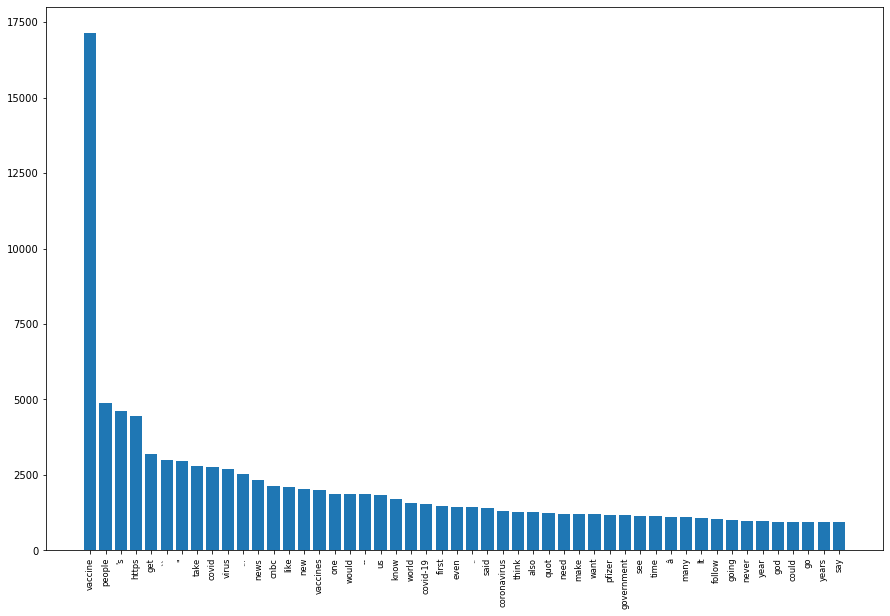

In [21]:
fig, ax0 = plt.subplots(figsize=(15,10))
ax0.bar(count_sort.index, count_sort['counts'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

In [23]:
stemmer = nltk.stem.SnowballStemmer("english")
stems = []
for i in you['no_punct']:
    stems.append([stemmer.stem(word) for word in i])
    
you['stemmed'] = stems

In [24]:
freq2 = [FreqDist(x) for x in you['stemmed']]
you['freqs2'] = freq2
you['freqs2']

0        {'got': 1, 'moderna': 1, 'vaccin': 1, 'hereâ€™...
1        {'charlott': 1, 'haggerti': 1, 'realli': 1, 'b...
2        {'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...
3        {'sweet': 1, 'heart': 1, 'well': 1, 'quanta': ...
4        {'angryangi': 1, 'recommend': 1, 'flu': 5, 'sh...
                               ...                        
12486    {'pfizer': 1, 'fine': 1, 'corpor': 1, 'us': 1,...
12487    {'women': 1, 'first': 3, 'person': 2, 'get': 1...
12488    {'breast': 1, 'cancer': 1, 'survivor': 1, 'goo...
12489    {'panel': 1, 'member': 1, 'first': 1, 'get': 1...
12490    {'tom': 1, 'r': 1, 'wo': 1, 'return': 1, 'easi...
Name: freqs2, Length: 12491, dtype: object

In [25]:
you['f2_counts'] = [Counter(x) for x in you['freqs2']]
you['f2_counts'][1]

Counter({'charlott': 1,
         'haggerti': 1,
         'realli': 1,
         'believ': 1,
         'everyth': 1,
         'told': 1,
         'vaccin': 2,
         'end': 1,
         'pandem': 1,
         'herd': 1,
         'immun': 1,
         'howev': 1,
         'claim': 1,
         'virus': 1,
         'gone': 1,
         'august': 1,
         'btw': 1})

In [26]:
wordcounts = Counter()
for i in you['f2_counts']:
    wordcounts += i

In [35]:
counts2 = pd.DataFrame.from_dict(dict(wordcounts), orient='index')
counts2

,0
got,704
moderna,297
vaccin,20610
hereâ€™,17
list,150
...,...
viz,2
//www.mdpi.com/1660-4601/17/22/8674,1
adventur,1
hindi,1


In [36]:
counts2 = counts2.rename(columns = {0: 'counts'})
counts2.head(50)

,counts
got,704
moderna,297
vaccin,20610
hereâ€™,17
list,150
side,832
effect,1773
https,4469
//youtu.be/9swygynujao,2
charlott,13


In [37]:
count_sort2 = counts2.sort_values('counts', ascending = False)[:50]
count_sort2

,counts
vaccin,20610
peopl,4940
's,4614
https,4469
get,4232
take,3915
virus,3061
``,2989
'',2969
covid,2781


So going through essentially the same process as our unstemmed data, we can see similar results. "Vaccin" still outnumbers the rest of the words by far, but now since we stemmed the data some of the meaningless characters left over from previous processes are now eliminated, making room for more words that may be of some significance. Some words that I would keep in mind in this case are "death", "die", "effect", and "govern". Next we begin our VADER sentiment analysis, which should give us a much better idea as to what people think about vaccines.

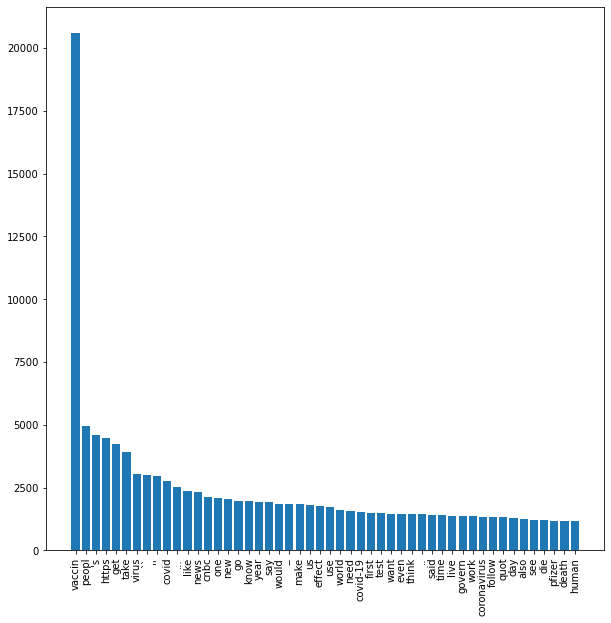

In [38]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.bar(count_sort2.index, count_sort2['counts'])
plt.xticks(rotation=90, fontsize = 'medium')
plt.show()

### Vader Sentiment Analysis

Using the sentiment analysis tool VADER, we will take a look at the overall sentiment (positive, negative, and neutral) concerning COVID-19 vaccines. After, we will plot the sentiment for each of the comments using univariate distribution again. Finally, we will look at the average sentiment for the whole data set, which should give us the answers we are looking for.

In [39]:
analyser = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

The output below consists of the sentiment for the first 20 comments found in our data set. Already we can see that a lot of the sentiment towards the COVID-19 vaccine is neutral. 

In [40]:
you['vader_scores'] = [analyser.polarity_scores(x) for x in you['Full Text']]
you['vader_scores'].head(20)

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.076, 'neu': 0.728, 'pos': 0.196, 'co...
3     {'neg': 0.06, 'neu': 0.817, 'pos': 0.123, 'com...
4     {'neg': 0.105, 'neu': 0.792, 'pos': 0.103, 'co...
5     {'neg': 0.0, 'neu': 0.949, 'pos': 0.051, 'comp...
6     {'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'comp...
7     {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...
8     {'neg': 0.036, 'neu': 0.811, 'pos': 0.154, 'co...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.047, 'neu': 0.886, 'pos': 0.067, 'co...
11    {'neg': 0.246, 'neu': 0.719, 'pos': 0.035, 'co...
12    {'neg': 0.051, 'neu': 0.882, 'pos': 0.067, 'co...
13    {'neg': 0.135, 'neu': 0.778, 'pos': 0.087, 'co...
14    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
15    {'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp...
16    {'neg': 0.134, 'neu': 0.841, 'pos': 0.025, 'co...
17    {'neg': 0.064, 'neu': 0.638, 'pos': 0.298,

In [57]:
you['pos'] = [x['pos'] for x in you['vader_scores']]
you['pos'].head(20)

0     0.000
1     0.000
2     0.196
3     0.123
4     0.103
5     0.051
6     0.000
7     0.149
8     0.154
9     0.000
10    0.067
11    0.035
12    0.067
13    0.087
14    0.000
15    0.000
16    0.025
17    0.298
18    0.062
19    0.009
Name: pos, dtype: float64

In [58]:
you['neu'] = [x['neu'] for x in you['vader_scores']]
you['neu'].head(20)

0     1.000
1     1.000
2     0.728
3     0.817
4     0.792
5     0.949
6     0.902
7     0.851
8     0.811
9     1.000
10    0.886
11    0.719
12    0.882
13    0.778
14    1.000
15    0.845
16    0.841
17    0.638
18    0.820
19    0.936
Name: neu, dtype: float64

In [59]:
you['neg'] = [x['neg'] for x in you['vader_scores']]
you['neg'].head(20)

0     0.000
1     0.000
2     0.076
3     0.060
4     0.105
5     0.000
6     0.098
7     0.000
8     0.036
9     0.000
10    0.047
11    0.246
12    0.051
13    0.135
14    0.000
15    0.155
16    0.134
17    0.064
18    0.118
19    0.055
Name: neg, dtype: float64

Below is our positive sentiment univariate plot.

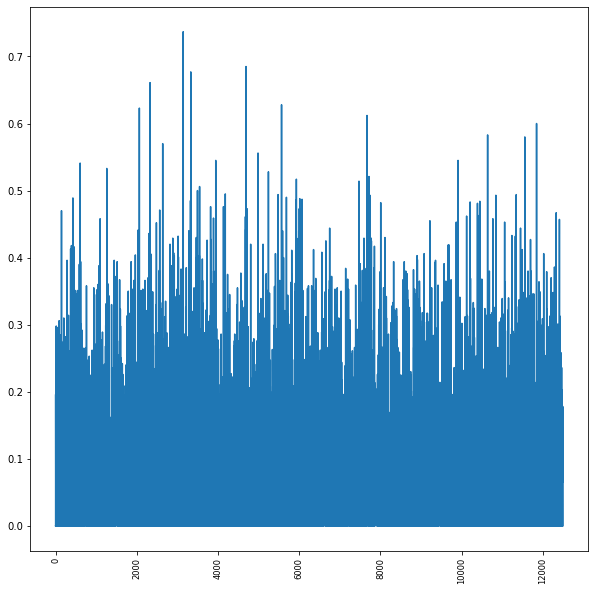

In [60]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(you['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

Here is our neutral sentiment univariate plot.

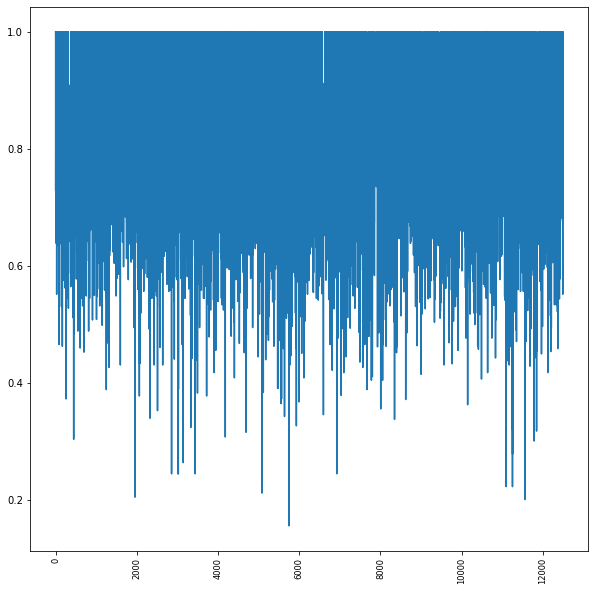

In [61]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(you['neu'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

Finally, here is our negative sentiment univariate plot.

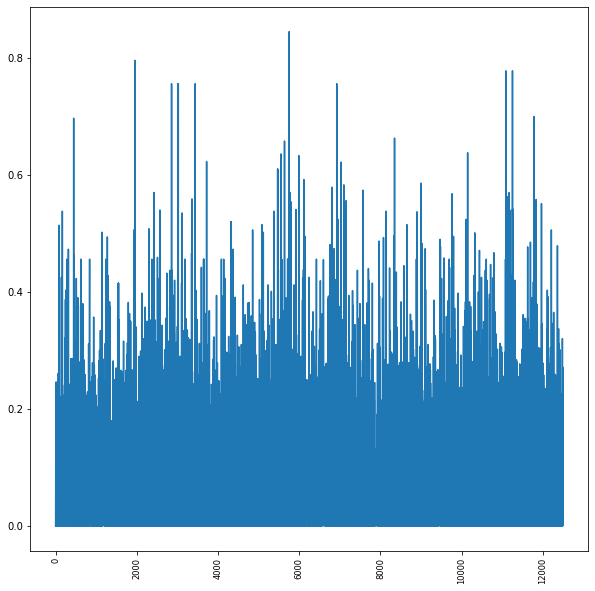

In [62]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(you['neg'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

If we take a look at the graphs above, we can see that the neutral sentiment plot is almost the exact opposite of the positive and negative sentiment plots. There appears to be a much higher amount of neutral sentiment compared to the other two. This makes sense, as we noted before that at least towards the beginning of the data we were seeing a lot of neutral sentiment. Now let's look at the average sentiment across the whole of the data.

In [63]:
from scipy import stats

In [64]:
stats.describe(you['pos']).mean

0.08773813145464736

In [65]:
stats.describe(you['neu']).mean

0.8209913537747179

In [66]:
stats.describe(you['neg']).mean

0.09127187575054038

So, according to the code above, we are seeing an average of 8% positive, 82% neutral, and 9% negative sentiment across all of the comments in our data. Of course, we should consider that these percentages may not be completely accurate as the VADER tool does not work perfectly. Some of the language that we use like slang along with the use of sarcasm and other certain emotions cannot be entirely understood by VADER, as it's not a human being. However, I believe that this sentiment test does provide us with enough information to understand the conversations being had on vaccines.

## In Conclusion...
According to our VADER sentiment test, the comments found in our data set are overwhelmingly neutral. This is a satisfying find for me personally as I think that these results show that people are indeed having intelligent and worthwhile conversations on the implications of the COVID-19 vaccination. I do wish that the positive sentiment average was a bit higher because vaccines are good! Regarding our word frequency analysis, it seems to me that those results support what we found through VADER. The most frequently used words in my opinion were neither really negative or positive (with some exceptions) so it'd only make sense that most of the comments were neutral. As I mentioned towards the beginning, the inclusion of likes or any type of engagement data would add some insight into these results, but I feel quite satisfied about what we found with what we had.